# 2020-08-04 Reports
First look at reports to analyze episode cost behavior

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
from pathlib import Path
import os

project_dir = Path(globals()['_dh'][0]+"/..").resolve()
os.chdir(project_dir)
print("Running notebook from: " + os.path.abspath(""))

from IPython.core.interactiveshell import InteractiveShell
 InteractiveShell.ast_node_interactivity = "last_expr" # Default jupyter behavior
#InteractiveShell.ast_node_interactivity = "all" # All expressions are shown.

Running notebook from: /Users/aleph/Documents/jota/tesis/ts_mcfrl


# 1 - Load the data

In [84]:
summary_bestfit_ep0 = pd.read_csv("python/data/results/randomvalid_validation/ep_0/summary_movement_report.csv").reset_index()
details_bestfit_ep0 = pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/randomvalid_validation/ep_0/movement_detail_report.csv")



In [86]:
int("1")

1

In [87]:
import os

def read(directory):
    reports = [(d,pd.read_csv(f"{directory}/"+d+'/summary_movement_report.csv')) for d in os.listdir(directory) if "ep_" in d]
    summaries = []
    for d,x in reports:
        x['ep']=int(d.replace('ep_',''))
        summaries=summaries + [x]
    summaries_df=pd.concat(summaries,axis=0)
    return summaries_df
    
#[d for d in os.listdir("python/data/results/dqn_few_warehouses")]
dqn_summary_500eps =read("python/data/results/dqn_few_warehouses/")#[(d,pd.read_csv("python/data/results/dqn_few_warehouses/"+d+'/summary_movement_report.csv')) for d in os.listdir("python/data/results/dqn_few_warehouses") if "ep_" in d]
# dqn_summary_reports = []
# for d,dqn_report in dqn_summary_reports_t:
#     dqn_report['ep']=d.replace('ep_','')
#     dqn_summary_reports=dqn_summary_reports + [dqn_report]
# print(len(dqn_summary_reports_t))
# dqn_summary_500eps=pd.concat(dqn_summary_reports,axis=0)

bestfit_summary_500eps=read("python/data/results/bestfit_few_warehouses/")
dumb_summary_500eps=read("python/data/results/dumb_few_warehouses/")


# 2 - Exploration

## 2.1 Exploring total cost

,index,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost,total_cost
0,0,567,8505,0,0,0,0,8505
1,1,197,2955,0,0,0,0,2955
2,2,0,0,0,0,2012,30180,30180
3,3,1336,20040,0,0,1990,29850,49890
4,4,454,6810,0,0,1990,29850,36660


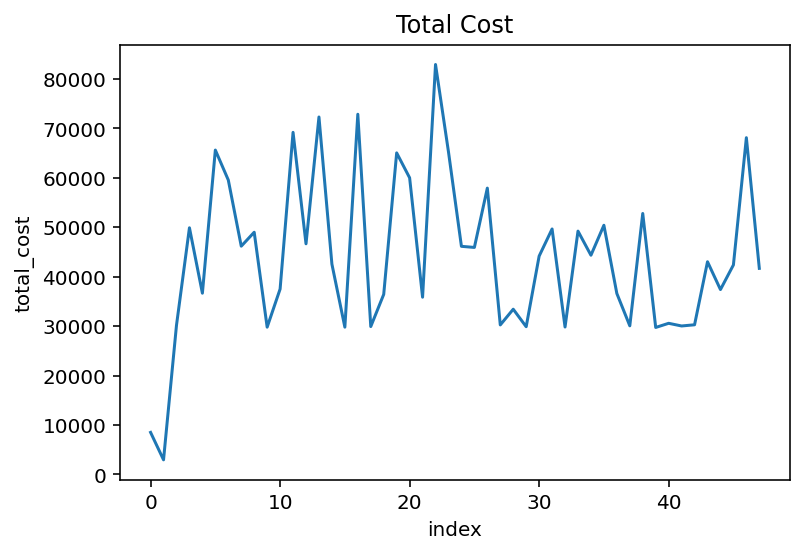

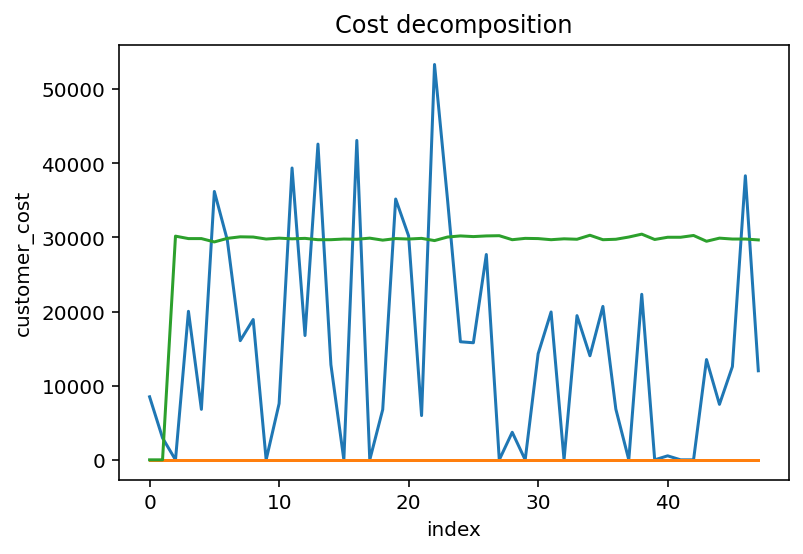

In [38]:
plt.figure();
sns.lineplot(x='index',y='total_cost',data=summary_bestfit_ep0).set_title("Total Cost");

plt.figure();
sns.lineplot(x='index',y='transportation_cost',data=summary_bestfit_ep0).set_title("Cost decomposition");
sns.lineplot(x='index',y='inventory_cost',data=summary_bestfit_ep0);
sns.lineplot(x='index',y='customer_cost',data=summary_bestfit_ep0);

summary_bestfit_ep0.head()

## 2.2 Movement Detail
As of aug 4, there's something wrong with inventory units \& inventory cost.

In [41]:
details_bestfit_ep0.head()

,source_name,destination_name,source_time,destination_time,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost
0,dcs_0,dcs_1,1,1,DC,DC,Transportation,183,2745,0,0,0,0
1,dcs_2,dcs_1,1,1,DC,DC,Transportation,123,1845,0,0,0,0
2,dcs_0,dcs_2,1,1,DC,DC,Transportation,183,2745,0,0,0,0
3,dcs_1,dcs_2,1,1,DC,DC,Transportation,78,1170,0,0,0,0
4,dcs_1,dcs_0,2,2,DC,DC,Transportation,77,1155,0,0,0,0


In [42]:
details_bestfit_ep0.query('inventory_units>0')

,source_name,destination_name,source_time,destination_time,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost


In [72]:
details_bestfit_ep0.query("source_name==destination_name")

,source_name,destination_name,source_time,destination_time,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost


## 2.3 Exploring 500 eps runs
Running with designed params: 
```
num_dcs = 3
num_customers = 100  #scale up to 200
num_commodities = 35  # scale up to 50
orders_per_day = int(num_customers * 0.05) #was going to be 0.1 but ran too slow.
# orders_per_day = 2
dcs_per_customer = 2
demand_mean = 500
demand_var = 150
num_steps = 10  # 1 month
num_episodes = 500
```

Preservar la historia para analizar las decisiones que se tomaron. Las decisiones son independientes de la señal de demanda.

### Notas meet tutores
- Correr con la misma semilla para los tres agentes.
- Comparar las decisiones de Best Fit vs. la NN.
- Guardar pesos a los 500EP y luego comparar best fit y DQN con la misma semilla
- Bajar los costs a una escala más trabajable para poder compararlos.
- Un STD más bajo en en DQN es valioso, buscar demostrar esto estadísticamente
- Qué tanto varía para un cliente los DCs que se asiginan
- Agregar un stack a la NN de las ordenes que van en tránsito
- Usar menos capas, ojalá una sola capa oculta.
- Meterle regularización o se va a aprender el DS.
- Experience replay? 
- Prioridad a simplificar el modelo.
- Nacho quiere ver cómo se portan con corridas idénticas.

Text(0.5, 1.0, 'dumb_summary_500eps')

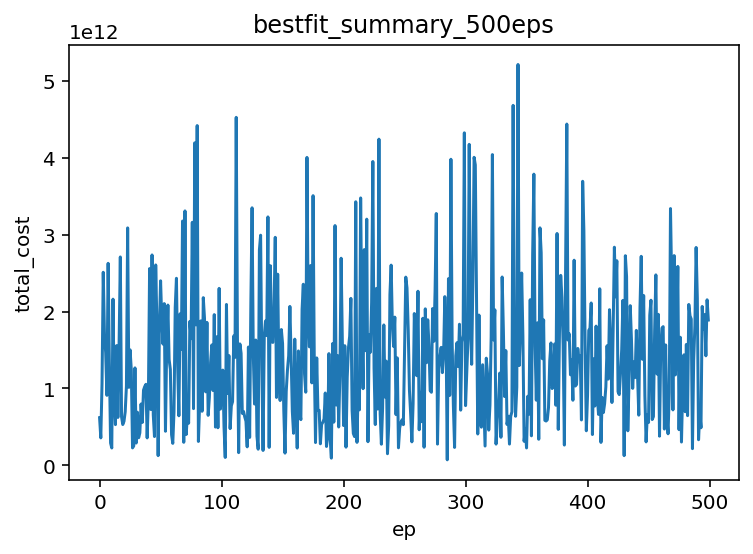

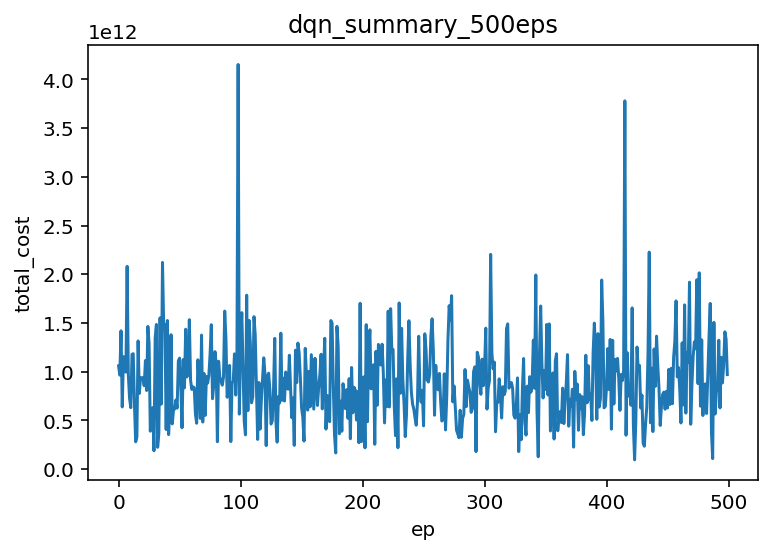

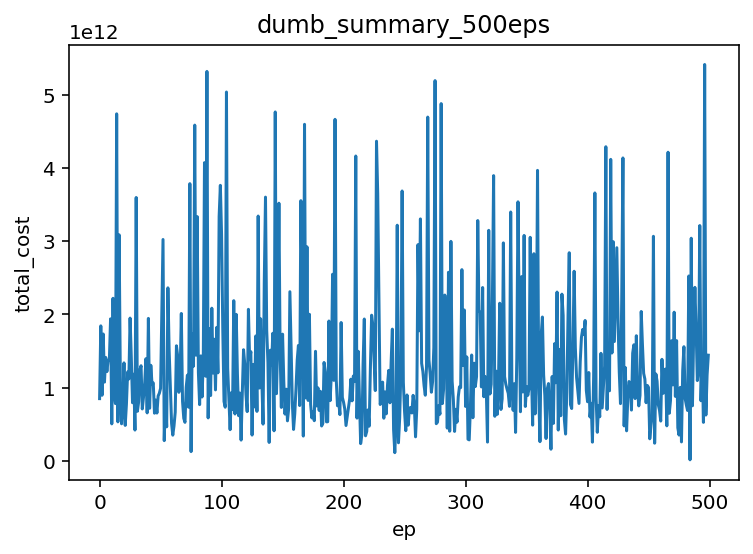

In [113]:
# bestfit_summary_500eps
# dumb_summary_500eps
# dqn_summary_500eps
plt.figure()
sns.lineplot(x='ep',y='total_cost',data=bestfit_summary_500eps.sort_values('ep').groupby('ep').sum()['total_cost'].reset_index()).set_title('bestfit_summary_500eps')
plt.figure()
sns.lineplot(x='ep',y='total_cost',data=dqn_summary_500eps.sort_values('ep').groupby('ep').sum()['total_cost'].reset_index()).set_title('dqn_summary_500eps')
plt.figure()
sns.lineplot(x='ep',y='total_cost',data=dumb_summary_500eps.sort_values('ep').groupby('ep').sum()['total_cost'].reset_index()).set_title('dumb_summary_500eps')

In [119]:
print(bestfit_summary_500eps.total_cost.mean())
print(dqn_summary_500eps.total_cost.mean())
print(dumb_summary_500eps.total_cost.mean())
print('---')
print(bestfit_summary_500eps.total_cost.std())
print(dqn_summary_500eps.total_cost.std())

150342692213.11044
98211774550.76982
143434952842.92203
---
318798618013.5167
155912835735.55557
